# Homework 4: Clustering

## Data

We will use a data set about beer for our clustering homework.

In [1]:
# beer dataset
import pandas as pd
beer = pd.read_csv('data/beer.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
# define X
X = beer.drop('name', axis=1)
column_list = list(X.columns.values)

**Note**

We don't need a Y as our target variable, because clustering is an unsupervised learning, 

** Standardize the data **

Standardization of a dataset is a common requirement for many machine learning estimators. sk-learn provides a convenient function "StandardScaler" for this purpose: it standardize features by removing the mean and scaling to unit variance.

In [3]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=column_list)

## K-means clustering

### Task 1: use the K-means algorithm to make 3 (k=3) clusters of the beer data.

Question 1.1: What do the clusters seem to be based on? Why?

In [27]:
from sklearn.cluster import KMeans
import numpy as np
from dstools import data_tools
from IPython.display import display, HTML
from scipy.spatial.distance import cosine
from scipy.spatial.distance import pdist, squareform

k_clusters = 3

# Fit and predict clusters
model = KMeans(k_clusters)
model.fit(X)
clusters = model.predict(X)

# Do some messy stuff to print a nice table of clusters
cluster_listing = {}
for cluster in range(k_clusters):
    cluster_listing['Cluster ' + str(cluster)] = [''] * 20
    where_in_cluster = np.where(clusters == cluster)[0]
    cluster_listing['Cluster ' + str(cluster)]= where_in_cluster
    cluster_listing['Cluster ' + str(cluster)][0:len(where_in_cluster)] = X.index[where_in_cluster]
    
    List = []
    for index in cluster_listing['Cluster ' + str(cluster)]:
        List.append(list(X.iloc[index]))    
        
    print 'Cluster ' + str(cluster)
    df=pd.DataFrame(List,columns=column_list)
    display(df)
    
    print 'Cluster ' + str(cluster) + ' Euclidean Distance Matrix'
    distances = pdist(df.values, metric='euclidean')
    DistMatrix = squareform(distances)
    print display(pd.DataFrame(DistMatrix))
    
    print '\n'


Cluster 0


,calories,sodium,alcohol,cost
0,1.268765,-1.239354,0.905338,1.667960
1,0.658944,-0.615780,0.716726,1.951265
2,0.591187,0.631369,0.433808,1.880438
3,0.557308,-1.395248,0.716726,2.092917


Cluster 0 Euclidean Distance Matrix


,0,1,2,3
0,0.000000,0.936249,2.055774,0.864082
1,0.936249,0.000000,1.282587,0.798728
2,2.055774,1.282587,0.000000,2.057550
3,0.864082,0.798728,2.057550,0.000000


None


Cluster 1


,calories,sodium,alcohol,cost
0,0.828339,0.007795,-3.149822,-0.102698
1,-1.136637,-0.771673,0.056584,-0.456830
2,-0.662332,-1.083460,-0.509253,-0.669309
3,-1.035000,0.007795,-0.132028,-0.244351
4,0.083003,-0.615780,-0.037722,0.038954
5,-2.186883,0.007795,-1.829537,-0.810961
6,-2.051367,-1.395248,-1.263701,-0.244351
7,-1.204395,-1.239354,-0.037722,-0.173524


Cluster 1 Euclidean Distance Matrix


,0,1,2,3,4,5,6,7
0,0.000000,3.856831,3.272093,3.549532,3.263373,3.366950,3.720047,3.921424
1,3.856831,0.000000,0.829153,0.835836,1.329105,2.322380,1.736052,0.558992
2,3.272093,0.829153,0.000000,1.285537,1.224021,2.297457,1.666256,0.886723
3,3.549532,0.835836,1.285537,0.000000,1.314508,2.128243,2.069351,1.264114
4,3.263373,1.329105,1.224021,1.314508,0.000000,3.078016,2.597382,1.446162
5,3.366950,2.322380,2.297457,2.128243,3.078016,0.000000,1.621145,2.477416
6,3.720047,1.736052,1.666256,2.069351,2.597382,1.621145,0.000000,1.499902
7,3.921424,0.558992,0.886723,1.264114,1.446162,2.477416,1.499902,0.000000


None


Cluster 2


,calories,sodium,alcohol,cost
0,0.387913,0.007795,0.433808,-0.456830
1,0.625066,0.631369,0.622420,-0.456830
2,0.421792,1.254943,0.339502,-1.519224
3,1.438159,1.410837,1.188256,-0.669309
4,0.557308,1.878518,0.433808,-0.527656
5,0.252398,0.475475,0.339502,-0.386003
6,0.218519,0.631369,0.150890,-0.456830
7,0.387913,1.410837,0.622420,-0.456830


Cluster 2 Euclidean Distance Matrix


,0,1,2,3,4,5,6,7
0,0.000000,0.693297,1.641373,1.919866,1.879712,0.500999,0.705395,1.415663
1,0.693297,0.000000,1.280191,1.278284,1.265133,0.498240,0.622592,0.814746
2,1.641373,1.280191,0.000000,1.581153,1.182925,1.385805,1.262704,1.110935
3,1.919866,1.278284,1.581153,0.000000,1.258524,1.755442,1.793424,1.211748
4,1.879712,1.265133,1.182925,1.258524,0.000000,1.445841,1.324846,0.536666
5,0.500999,0.498240,1.385805,1.755442,1.445841,0.000000,0.256985,0.989103
6,0.705395,0.622592,1.262704,1.793424,1.324846,0.256985,0.000000,0.926610
7,1.415663,0.814746,1.110935,1.211748,0.536666,0.989103,0.926610,0.000000


None




### Task 2: Plot all data points on scatter charts. Each chart displays data on two attributes, so there will be 6 charts in total. Use different colors for clusters. Also plot cluster centers with a different symbol from beer data points. 

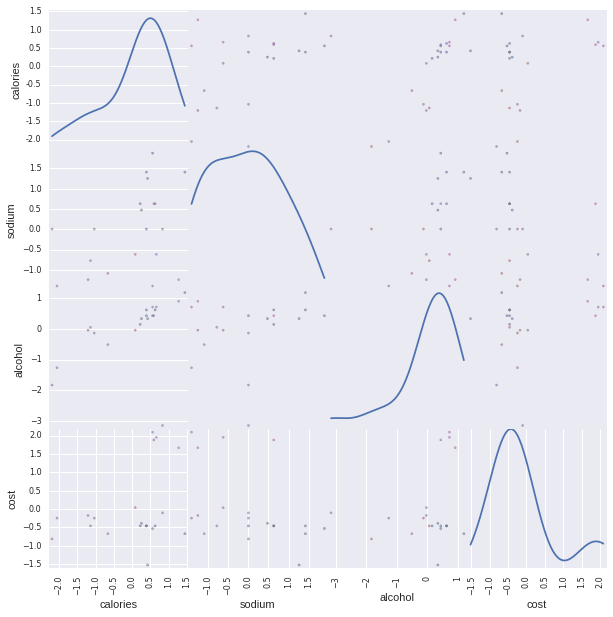

In [59]:
%matplotlib inline
import matplotlib.pylab as plt
from pandas.tools.plotting import scatter_matrix

plt.rcParams['figure.figsize'] = 10, 10

# KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clusters = kmeans.predict(X)
scatter_matrix(X, alpha=0.5, color=data_tools.colorizer(clusters), diagonal='kde')
#plt.scatter(X['alcohol'], X['sodium'], color=['r', 'b'])


plt.show()

## Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

## Task 3: compute Silhouette coefficients for k-means models with k=2 to 19. Plot the results with a line chart. What k value do you think the optimal?

With k = 2, the silhouette score is: 0.330715
With k = 3, the silhouette score is: 0.457774
With k = 4, the silhouette score is: 0.475464
With k = 5, the silhouette score is: 0.444066
With k = 6, the silhouette score is: 0.365390
With k = 7, the silhouette score is: 0.339076
With k = 8, the silhouette score is: 0.307629
With k = 9, the silhouette score is: 0.269898
With k = 10, the silhouette score is: 0.267205
With k = 11, the silhouette score is: 0.254959
With k = 12, the silhouette score is: 0.268134
With k = 13, the silhouette score is: 0.258062
With k = 14, the silhouette score is: 0.195104
With k = 15, the silhouette score is: 0.183978
With k = 16, the silhouette score is: 0.123329
With k = 17, the silhouette score is: 0.132725
With k = 18, the silhouette score is: 0.097954
With k = 19, the silhouette score is: 0.053572


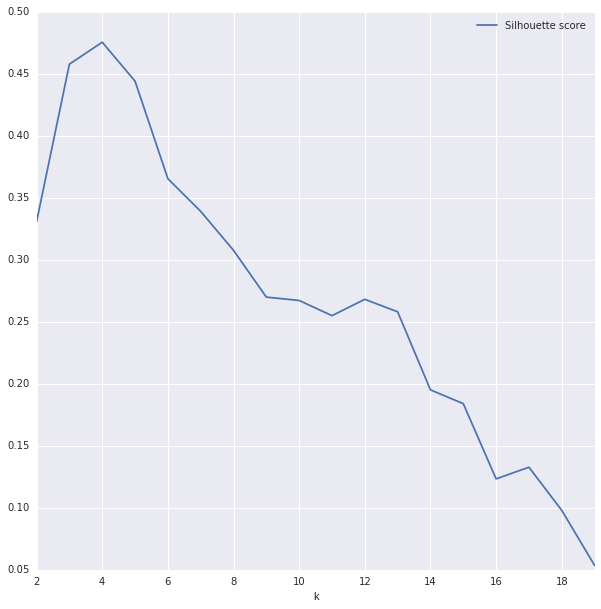

In [50]:
from sklearn import metrics

score_vector = []
for i in range (2,20):
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(X)
    labels = kmeans_model.labels_
    score = metrics.silhouette_score(X, labels, metric='euclidean')
    print "With k = %i, the silhouette score is: %f" %(i, score)
    score_vector.append((i, score))

df = pd.DataFrame(score_vector, columns=['k','Silhouette score'])
df.plot(x='k', y='Silhouette score')